# iHuman: Instant Animatable Digital Humans From Monocular Videos [ECCV 2024]

### This is official colab implementation of the paper: "iHuman: Instant Animatable Digital Humans From Monocular Videos".

Learn more on our project page: [iHuman](https://pramishp.github.io/iHuman/index.html)


#### You must select a run time with GPU eg. T4 and add the following two directories as shortcut to your google drive at "My Drive"

Go to Runtime -> Change runtime type and select GPU (e.g., T4).

- Get the prebuilt wheels: https://drive.google.com/drive/folders/1tNCO1sfMlKS5X2aWEEtAniF-eYSn_66h?usp=sharing

- Get the dataset, models and other assests: https://drive.google.com/drive/folders/1Ux98nBmlGbtvjyiu_k_aZYASXCH4Qy5P?usp=drive_link

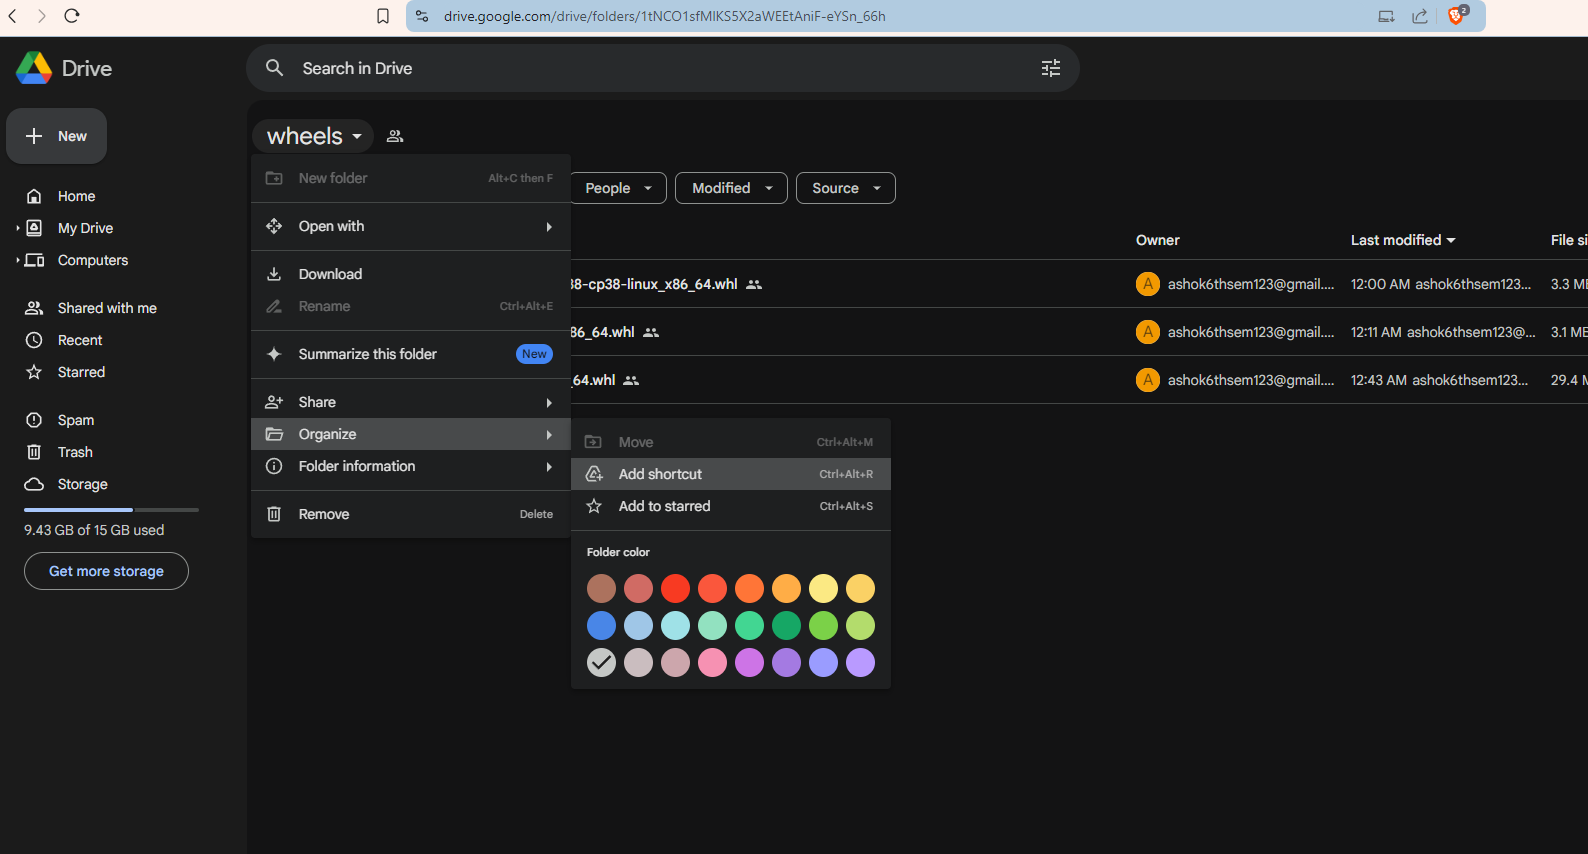

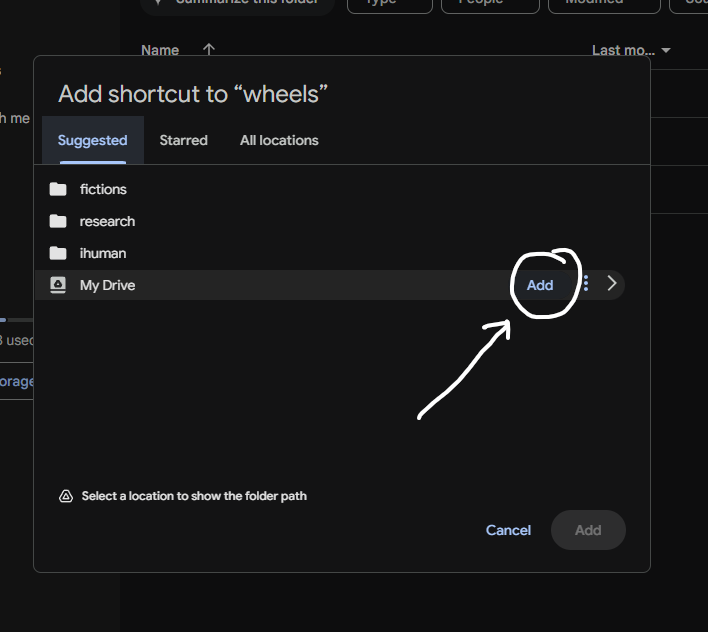


## Mount the drive to load the assests in colab

Please provide access to read and write in the google drive


In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Download code from github and install conda


In [1]:
!git clone https://github.com/pramishp/ihuman.git
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


## Creating a new conda env for the project may take upto 15mins


In [2]:
!conda env create -f /content/ihuman/environment-cuda12_1.yaml

Streaming output truncated to the last 5000 lines.

torchtriton-3.0.0    | 233.4 MB  | :  79% 0.7871838091425487/1 [00:08<00:01,  6.67s/it]
libcublas-12.1.0.26  | 329.0 MB  | :  52% 0.5240777320724572/1 [00:08<00:04,  9.81s/it]


pytorch-2.4.1        | 1.35 GB   | :  13% 0.12670434858759363/1 [00:08<00:36, 42.12s/it]

torchtriton-3.0.0    | 233.4 MB  | :  80% 0.8023142344586073/1 [00:08<00:01,  6.70s/it]
pytorch-2.4.1        | 1.35 GB   | :  13% 0.12909521046847203/1 [00:08<00:36, 42.39s/it]

torchtriton-3.0.0    | 233.4 MB  | :  82% 0.8225997161876591/1 [00:08<00:01,  6.13s/it]
pytorch-2.4.1        | 1.35 GB   | :  13% 0.1314634101514274/1 [00:08<00:37, 43.08s/it] 

torchtriton-3.0.0    | 233.4 MB  | :  84% 0.83900216841082/1 [00:08<00:01,  6.36s/it]  
pytorch-2.4.1        | 1.35 GB   | :  13% 0.1339902452198439/1 [00:08<00:36, 42.00s/it]

torchtriton-3.0.0    | 233.4 MB  | :  85% 0.8548020815727218/1 [00:08<00:01,  7.03s/it]
pytorch-2.4.1        | 1.35 GB   | :  14% 0.136381107100722

## Installing following libraries may take about 3 min


In [4]:
!source activate ihuman && conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
!source activate ihuman && conda install -c iopath iopath
!source activate ihuman && conda install pytorch3d -c pytorch3d

Channels:
 - pytorch
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/ihuman

  added / updated specs:
    - pytorch
    - pytorch-cuda=12.1
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    cffi-1.15.0                |   py38h3931269_0         226 KB  conda-forge
    charset-normalizer-3.4.0   |     pyhd8ed1ab_0          46 KB  conda-forge
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    h2-4.1.0                   |     pyhd8ed1ab_

## Install remaining libraries


In [10]:
!source activate ihuman && /usr/local/envs/ihuman/bin/pip install --no-index --find-links=/content/drive/MyDrive/wheels /content/drive/MyDrive/wheels/diff_gaussian_rasterization-0.0.0-cp38-cp38-linux_x86_64.whl
!source activate ihuman && /usr/local/envs/ihuman/bin/pip install /content/drive/MyDrive/wheels/simple_knn-0.0.0-cp38-cp38-linux_x86_64.whl
!source activate ihuman && /usr/local/envs/ihuman/bin/pip install /content/drive/MyDrive/wheels/tinycudann-1.7-cp38-cp38-linux_x86_64.whl
!source activate ihuman && /usr/local/envs/ihuman/bin/pip install git+https://github.com/mattloper/chumpy@9b045ff5d6588a24a0bab52c83f032e2ba433e17

Looking in links: /content/drive/MyDrive/wheels
Processing /content/drive/MyDrive/wheels/diff_gaussian_rasterization-0.0.0-cp38-cp38-linux_x86_64.whl


## Get all the assests including dataset and models into the required locations


In [24]:
!unzip /content/drive/MyDrive/ihuman/male-3-casual.zip -d ./temp/
!mkdir -p /content/ihuman/data/peoplesnapshot/
!mv ./temp/* /content/ihuman/data/peoplesnapshot/
!unzip /content/drive/MyDrive/ihuman/SMPL_python_v.1.1.0.zip -d ./temp_smpl/
!mkdir -p /content/ihuman/data/smplx_models/smpl/
!mv ./temp_smpl/SMPL_python_v.1.1.0/smpl/models/*.pkl /content/ihuman/data/smplx_models/smpl/
!mkdir -p /content/ihuman/data/smpl/models
!cp /content/ihuman/data/smplx_models/smpl/basicmodel_f_lbs_10_207_0_v1.1.0.pkl /content/ihuman/data/smpl/models/SMPL_FEMALE.pkl
!cp /content/ihuman/data/smplx_models/smpl/basicmodel_m_lbs_10_207_0_v1.1.0.pkl /content/ihuman/data/smpl/models/SMPL_MALE.pkl
!cp /content/ihuman/data/smplx_models/smpl/basicmodel_neutral_lbs_10_207_0_v1.1.0.pkl /content/ihuman/data/smpl/models/SMPL_NEUTRAL.pkl
!unzip /content/drive/MyDrive/ihuman/small.zip -d ./temp/
!mkdir -p /content/ihuman/data/smpl/
!mv ./temp/* /content/ihuman/data/smpl/
!mkdir -p /content/ihuman/data/animation/
!cp -r /content/drive/MyDrive/ihuman/animation/* /content/ihuman/data/animation


Archive:  /content/drive/MyDrive/ihuman/male-3-casual.zip
   creating: ./temp/male-3-casual/
  inflating: ./temp/male-3-casual/cameras.npz  
  inflating: ./temp/male-3-casual/poses.npz  
  inflating: ./temp/male-3-casual/keypoints.npy  
   creating: ./temp/male-3-casual/images/
  inflating: ./temp/male-3-casual/images/image_0000.png  
  inflating: ./temp/male-3-casual/images/image_0001.png  
  inflating: ./temp/male-3-casual/images/image_0002.png  
  inflating: ./temp/male-3-casual/images/image_0003.png  
  inflating: ./temp/male-3-casual/images/image_0004.png  
  inflating: ./temp/male-3-casual/images/image_0005.png  
  inflating: ./temp/male-3-casual/images/image_0006.png  
  inflating: ./temp/male-3-casual/images/image_0007.png  
  inflating: ./temp/male-3-casual/images/image_0008.png  
  inflating: ./temp/male-3-casual/images/image_0009.png  
  inflating: ./temp/male-3-casual/images/image_0010.png  
  inflating: ./temp/male-3-casual/images/image_0011.png  
  inflating: ./temp/male-

## Training


In [25]:
%cd /content/ihuman/
!source activate ihuman && /usr/local/envs/ihuman/bin/python /content/ihuman/train.py


/content/ihuman
/content/ihuman/animatableGaussian/model/nerf_model.py:33: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/content/ihuman/animatableGaussian/model/nerf_model.py:51: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
Seed set to 0
loading trainset...
100% 19/19 [00:01<00:00, 14.09it/s]
100% 19/19 [00:01<00:00, 11.01it/s]
[train] Loading from ../../data/peoplesnapshot/male-3-casual/poses/anim_nerf_train.npz
loading valset...
100% 1/1 [00:00<00:00,  7.95it/s]
100% 1/1 [00:00<00:00,  9.41it/s]
[val] Loading from ../../data/peoplesnapshot/male-3-casual/poses/anim_nerf_val.npz
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100% 

## Animating


In [26]:
%cd /content/ihuman
!source activate ihuman && /usr/local/envs/ihuman/bin/python /content/ihuman/animate.py

/content/ihuman
/content/ihuman/animatableGaussian/model/nerf_model.py:33: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/content/ihuman/animatableGaussian/model/nerf_model.py:51: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
Seed set to 0
/usr/local/envs/ihuman/lib/python3.8/site-packages/lightning_fabric/utilities/cloud_io.py:55: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be f

## To download the output


In [ ]:
from google.colab import files
!zip -r outputs.zip /content/ihuman/outputs
files.download('outputs.zip')

